In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
#from imblearn.under_sampling import TomekLinks

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
db = pd.read_csv('/content/drive/My Drive/final_data_input_LAST_FINAL.csv')

In [ ]:
db.head()

,Unnamed: 0,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,not_dest_freq,Wrong_port,port_is_443,Wrong_port.1,destination_port_443,Duration,fs_1807,fs_more,fsless,FlowSentRate,FlowRecvRate,Pcket_lenVar,Length_std,Length_mean,L_median,L_mode,s_median,s_mode,PLCV,PTV,PT_std,PT_mean,PT_median,Packt_Time_mode,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,-0.440208,0,0,1,-0.047449,-0.068512,1.373156,1.345171,0.487511,-0.491741,-0.000535,0.121728,-0.010777,1.660695,-0.431219,-0.184718,-0.538284,-0.720731,-0.206235,-0.618505,0.754077,-0.178941,-0.244670,-0.239715,-0.221598,-0.159623,-0.652141,0.648299,-0.362176,Benign
1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.171644,0,0,1,-0.046519,-0.066069,-0.803914,-0.857288,-0.990306,-0.231637,2.240525,0.169689,-0.002464,-0.425578,-0.159825,0.166489,0.286223,0.252663,-0.206235,0.667936,-0.814219,-0.132047,0.277059,-0.183655,-0.225091,-0.159603,0.638875,-0.336711,1.168953,Benign
2,2,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.145800,0,0,1,-0.046384,-0.065895,-0.782394,-0.800554,-1.077896,0.241279,-0.000535,-0.230860,0.040893,-0.195131,-0.122865,0.208034,0.324102,0.333618,-0.206235,0.674878,-0.817715,-0.178940,-0.244316,-0.238336,-0.221617,-0.153063,0.260054,-0.500979,-0.415456,Benign
3,3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,2.703618,0,0,1,-0.047728,-0.069886,-0.917591,-1.403104,-1.467504,0.193987,4.363633,-1.802284,-0.745979,-1.651453,5.790106,3.400471,1.737912,1.455512,-0.206235,-0.012624,-0.316040,-0.178946,-0.250146,-0.238243,-0.221523,-0.152942,1.330461,-0.025069,-0.629109,Benign
4,4,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1.152860,0,0,1,-0.046574,-0.061795,0.003366,0.306569,0.810232,-0.231637,-0.708237,0.499202,0.169892,0.119444,-0.058679,0.277596,0.328046,0.327773,-0.206235,0.584831,-0.770578,-0.178937,-0.242955,-0.240378,-0.221754,-0.159628,-0.683835,0.237335,-0.213566,Benign


In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
db = db.iloc[:,1:46]

In [ ]:
db = db.iloc[:,0:45]

In [ ]:
db

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,not_dest_freq,Wrong_port,port_is_443,Wrong_port.1,destination_port_443,Duration,fs_1807,fs_more,fsless,FlowSentRate,FlowRecvRate,Pcket_lenVar,Length_std,Length_mean,L_median,L_mode,s_median,s_mode,PLCV,PTV,PT_std,PT_mean,PT_median,Packt_Time_mode,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,-0.440208,0,0,1,-0.047449,-0.068512,1.373156,1.345171,0.487511,-0.491741,-0.000535,0.121728,-0.010777,1.660695,-0.431219,-0.184718,-0.538284,-0.720731,-0.206235,-0.618505,0.754077,-0.178941,-0.244670,-0.239715,-0.221598,-0.159623,-0.652141,0.648299,-0.362176,Benign
1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.171644,0,0,1,-0.046519,-0.066069,-0.803914,-0.857288,-0.990306,-0.231637,2.240525,0.169689,-0.002464,-0.425578,-0.159825,0.166489,0.286223,0.252663,-0.206235,0.667936,-0.814219,-0.132047,0.277059,-0.183655,-0.225091,-0.159603,0.638875,-0.336711,1.168953,Benign
2,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.145800,0,0,1,-0.046384,-0.065895,-0.782394,-0.800554,-1.077896,0.241279,-0.000535,-0.230860,0.040893,-0.195131,-0.122865,0.208034,0.324102,0.333618,-0.206235,0.674878,-0.817715,-0.178940,-0.244316,-0.238336,-0.221617,-0.153063,0.260054,-0.500979,-0.415456,Benign
3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,2.703618,0,0,1,-0.047728,-0.069886,-0.917591,-1.403104,-1.467504,0.193987,4.363633,-1.802284,-0.745979,-1.651453,5.790106,3.400471,1.737912,1.455512,-0.206235,-0.012624,-0.316040,-0.178946,-0.250146,-0.238243,-0.221523,-0.152942,1.330461,-0.025069,-0.629109,Benign
4,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1.152860,0,0,1,-0.046574,-0.061795,0.003366,0.306569,0.810232,-0.231637,-0.708237,0.499202,0.169892,0.119444,-0.058679,0.277596,0.328046,0.327773,-0.206235,0.584831,-0.770578,-0.178937,-0.242955,-0.240378,-0.221754,-0.159628,-0.683835,0.237335,-0.213566,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-1.180485,0,0,1,0.042370,0.393385,1.858523,1.631520,1.129860,0.300394,-0.000535,0.119261,0.024568,1.347698,-0.806272,-1.305099,-0.916515,-0.720837,-0.206235,1.103071,-0.997728,-0.178940,-0.244337,-0.240169,-0.221636,-0.159490,-0.854542,0.436316,-0.311703,Malicious
269639,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-0.434267,0,0,1,-0.047440,-0.068485,0.085689,0.385244,0.261385,-0.491741,-0.000535,0.309057,0.064837,0.621267,-0.448326,-0.210618,-0.572127,-0.720611,-0.206235,-0.679932,0.947832,-0.178940,-0.244243,-0.240186,-0.221621,-0.159624,-0.858302,0.445921,-0.305124,Malicious
269640,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1.466744,0,0,1,-0.043935,-0.066106,-0.854811,-1.017466,-1.053418,-0.231637,2.240525,0.271037,0.035748,-0.766433,1.480249,1.464438,1.441005,1.336621,-0.206235,0.758734,-0.858274,-0.178946,-0.250175,-0.243940,-0.226451,-0.159623,0.488731,-0.315781,0.021393,Malicious
269641,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-0.446174,0,0,1,-0.047435,-0.068482,0.114244,0.411776,0.331262,-0.491741,-0.000535,0.324882,0.070598,0.596244,-0.452158,-0.216503,-0.567942,-0.720785,-0.206235,-0.665040,0.898332,-0.178940,-0.244267,-0.240184,-0.221634,-0.159625,-0.852680,0.450752,-0.306641,Malicious


In [ ]:
x1 = db.iloc[:,0:45]

In [ ]:
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,not_dest_freq,Wrong_port,port_is_443,Wrong_port.1,destination_port_443,Duration,fs_1807,fs_more,fsless,FlowSentRate,FlowRecvRate,Pcket_lenVar,Length_std,Length_mean,L_median,L_mode,s_median,s_mode,PLCV,PTV,PT_std,PT_mean,PT_median,Packt_Time_mode,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,-0.440208,0,0,1,-0.047449,-0.068512,1.373156,1.345171,0.487511,-0.491741,-0.000535,0.121728,-0.010777,1.660695,-0.431219,-0.184718,-0.538284,-0.720731,-0.206235,-0.618505,0.754077,-0.178941,-0.244670,-0.239715,-0.221598,-0.159623,-0.652141,0.648299,-0.362176,Benign
1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.171644,0,0,1,-0.046519,-0.066069,-0.803914,-0.857288,-0.990306,-0.231637,2.240525,0.169689,-0.002464,-0.425578,-0.159825,0.166489,0.286223,0.252663,-0.206235,0.667936,-0.814219,-0.132047,0.277059,-0.183655,-0.225091,-0.159603,0.638875,-0.336711,1.168953,Benign
2,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.145800,0,0,1,-0.046384,-0.065895,-0.782394,-0.800554,-1.077896,0.241279,-0.000535,-0.230860,0.040893,-0.195131,-0.122865,0.208034,0.324102,0.333618,-0.206235,0.674878,-0.817715,-0.178940,-0.244316,-0.238336,-0.221617,-0.153063,0.260054,-0.500979,-0.415456,Benign
3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,2.703618,0,0,1,-0.047728,-0.069886,-0.917591,-1.403104,-1.467504,0.193987,4.363633,-1.802284,-0.745979,-1.651453,5.790106,3.400471,1.737912,1.455512,-0.206235,-0.012624,-0.316040,-0.178946,-0.250146,-0.238243,-0.221523,-0.152942,1.330461,-0.025069,-0.629109,Benign
4,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1.152860,0,0,1,-0.046574,-0.061795,0.003366,0.306569,0.810232,-0.231637,-0.708237,0.499202,0.169892,0.119444,-0.058679,0.277596,0.328046,0.327773,-0.206235,0.584831,-0.770578,-0.178937,-0.242955,-0.240378,-0.221754,-0.159628,-0.683835,0.237335,-0.213566,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-1.180485,0,0,1,0.042370,0.393385,1.858523,1.631520,1.129860,0.300394,-0.000535,0.119261,0.024568,1.347698,-0.806272,-1.305099,-0.916515,-0.720837,-0.206235,1.103071,-0.997728,-0.178940,-0.244337,-0.240169,-0.221636,-0.159490,-0.854542,0.436316,-0.311703,Malicious
269639,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-0.434267,0,0,1,-0.047440,-0.068485,0.085689,0.385244,0.261385,-0.491741,-0.000535,0.309057,0.064837,0.621267,-0.448326,-0.210618,-0.572127,-0.720611,-0.206235,-0.679932,0.947832,-0.178940,-0.244243,-0.240186,-0.221621,-0.159624,-0.858302,0.445921,-0.305124,Malicious
269640,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1.466744,0,0,1,-0.043935,-0.066106,-0.854811,-1.017466,-1.053418,-0.231637,2.240525,0.271037,0.035748,-0.766433,1.480249,1.464438,1.441005,1.336621,-0.206235,0.758734,-0.858274,-0.178946,-0.250175,-0.243940,-0.226451,-0.159623,0.488731,-0.315781,0.021393,Malicious
269641,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-0.446174,0,0,1,-0.047435,-0.068482,0.114244,0.411776,0.331262,-0.491741,-0.000535,0.324882,0.070598,0.596244,-0.452158,-0.216503,-0.567942,-0.720785,-0.206235,-0.665040,0.898332,-0.178940,-0.244267,-0.240184,-0.221634,-0.159625,-0.852680,0.450752,-0.306641,Malicious


In [ ]:
x1 = db.iloc[:,0:44]

In [ ]:
y1 = db.iloc[:,44]

In [ ]:
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,not_dest_freq,Wrong_port,port_is_443,Wrong_port.1,destination_port_443,Duration,fs_1807,fs_more,fsless,FlowSentRate,FlowRecvRate,Pcket_lenVar,Length_std,Length_mean,L_median,L_mode,s_median,s_mode,PLCV,PTV,PT_std,PT_mean,PT_median,Packt_Time_mode,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time
0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,-0.440208,0,0,1,-0.047449,-0.068512,1.373156,1.345171,0.487511,-0.491741,-0.000535,0.121728,-0.010777,1.660695,-0.431219,-0.184718,-0.538284,-0.720731,-0.206235,-0.618505,0.754077,-0.178941,-0.244670,-0.239715,-0.221598,-0.159623,-0.652141,0.648299,-0.362176
1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.171644,0,0,1,-0.046519,-0.066069,-0.803914,-0.857288,-0.990306,-0.231637,2.240525,0.169689,-0.002464,-0.425578,-0.159825,0.166489,0.286223,0.252663,-0.206235,0.667936,-0.814219,-0.132047,0.277059,-0.183655,-0.225091,-0.159603,0.638875,-0.336711,1.168953
2,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1.145800,0,0,1,-0.046384,-0.065895,-0.782394,-0.800554,-1.077896,0.241279,-0.000535,-0.230860,0.040893,-0.195131,-0.122865,0.208034,0.324102,0.333618,-0.206235,0.674878,-0.817715,-0.178940,-0.244316,-0.238336,-0.221617,-0.153063,0.260054,-0.500979,-0.415456
3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,2.703618,0,0,1,-0.047728,-0.069886,-0.917591,-1.403104,-1.467504,0.193987,4.363633,-1.802284,-0.745979,-1.651453,5.790106,3.400471,1.737912,1.455512,-0.206235,-0.012624,-0.316040,-0.178946,-0.250146,-0.238243,-0.221523,-0.152942,1.330461,-0.025069,-0.629109
4,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1.152860,0,0,1,-0.046574,-0.061795,0.003366,0.306569,0.810232,-0.231637,-0.708237,0.499202,0.169892,0.119444,-0.058679,0.277596,0.328046,0.327773,-0.206235,0.584831,-0.770578,-0.178937,-0.242955,-0.240378,-0.221754,-0.159628,-0.683835,0.237335,-0.213566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-1.180485,0,0,1,0.042370,0.393385,1.858523,1.631520,1.129860,0.300394,-0.000535,0.119261,0.024568,1.347698,-0.806272,-1.305099,-0.916515,-0.720837,-0.206235,1.103071,-0.997728,-0.178940,-0.244337,-0.240169,-0.221636,-0.159490,-0.854542,0.436316,-0.311703
269639,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-0.434267,0,0,1,-0.047440,-0.068485,0.085689,0.385244,0.261385,-0.491741,-0.000535,0.309057,0.064837,0.621267,-0.448326,-0.210618,-0.572127,-0.720611,-0.206235,-0.679932,0.947832,-0.178940,-0.244243,-0.240186,-0.221621,-0.159624,-0.858302,0.445921,-0.305124
269640,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1.466744,0,0,1,-0.043935,-0.066106,-0.854811,-1.017466,-1.053418,-0.231637,2.240525,0.271037,0.035748,-0.766433,1.480249,1.464438,1.441005,1.336621,-0.206235,0.758734,-0.858274,-0.178946,-0.250175,-0.243940,-0.226451,-0.159623,0.488731,-0.315781,0.021393
269641,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-0.446174,0,0,1,-0.047435,-0.068482,0.114244,0.411776,0.331262,-0.491741,-0.000535,0.324882,0.070598,0.596244,-0.452158,-0.216503,-0.567942,-0.720785,-0.206235,-0.665040,0.898332,-0.178940,-0.244267,-0.240184,-0.221634,-0.159625,-0.852680,0.450752,-0.306641


In [ ]:
np.isnan(x1).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [ ]:
y1.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Benign, dtype: object

In [ ]:
from collections import Counter

print(Counter(y1))

Counter({'Malicious': 249836, 'Benign': 19807})


In [ ]:
c_class_0, c_class_1 = db.Benign.value_counts()

In [ ]:
c_class_0, c_class_1 = db.Benign.value_counts()

In [ ]:
print(c_class_0)
print(c_class_1)

249836
19807


In [ ]:
df_c_0 = db[db['Benign'] == 'Malicious']
df_c_1 = db[db['Benign'] == 'Benign']

In [ ]:
df_c_0_under = df_c_0.sample(c_class_1)

In [ ]:
df_under = pd.concat([df_c_0_under, df_c_1], axis=0)

In [ ]:
print(df_under.Benign.value_counts())

Benign       19807
Malicious    19807
Name: Benign, dtype: int64


In [ ]:
df_Totoal = df_under

In [ ]:
df_Totoal.head()

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,not_dest_freq,Wrong_port,port_is_443,Wrong_port.1,destination_port_443,Duration,fs_1807,fs_more,fsless,FlowSentRate,FlowRecvRate,Pcket_lenVar,Length_std,Length_mean,L_median,L_mode,s_median,s_mode,PLCV,PTV,PT_std,PT_mean,PT_median,Packt_Time_mode,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
202453,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.439854,0,1,0,-0.047426,-0.068474,-0.019150,0.284445,0.196436,-0.491741,-0.000535,0.324111,0.071348,0.538444,-0.461181,-0.230488,-0.586907,-0.720666,-0.206235,-0.701148,1.021434,-0.178939,-0.243648,-0.240379,-0.221390,-0.159627,-1.012573,0.315457,-0.253263,Malicious
197055,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,-1.178296,0,0,1,-0.014203,0.136778,2.038051,1.731006,1.069006,-0.491741,-0.000535,0.185125,0.011959,1.509157,-0.806266,-1.302196,-0.914146,-0.719297,-0.206235,0.851734,-0.899915,-0.178921,-0.237965,-0.234915,-0.218205,-0.159633,0.096567,0.611731,-0.352776,Malicious
126008,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,-0.434683,1,0,0,-0.046898,-0.067656,-0.139640,0.161048,0.112727,1.210758,-0.000535,-0.056540,0.079722,0.435410,-0.604722,-0.484360,-0.703147,-0.720037,-0.206235,-0.825329,1.541241,-0.178940,-0.243951,-0.241495,-0.226408,-0.159628,1.620853,0.085043,-0.106904,Malicious
56621,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,-0.434509,0,0,1,-0.047428,-0.068484,-0.019150,0.284445,0.196436,-0.491741,-0.000535,0.324111,0.071348,0.538444,-0.455737,-0.222030,-0.583356,-0.720715,-0.206235,-0.698808,1.013131,-0.178939,-0.243913,-0.240536,-0.221617,-0.159630,-1.004991,0.312919,-0.251847,Malicious
27692,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1.138781,0,0,1,-0.047719,-0.069863,-0.920094,-1.497010,-1.765057,-0.680908,-0.000535,-6.542905,-7.156664,-1.969383,1.255109,1.324446,1.408053,1.506616,-0.206235,0.846783,-0.897780,-0.178946,-0.250179,5.249212,4.543900,6.305689,0.245560,0.757492,-0.632207,Malicious


In [ ]:
x = df_Totoal.iloc[:,0:44]
y = df_Totoal.iloc[:,44]

In [ ]:
np.isnan(x).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
x_train.shape

(31691, 44)

In [ ]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="RMSprop",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=50,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")


print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/50
446/446 [==============================] - 3s 6ms/step - loss: 0.2073 - accuracy: 0.9243
Epoch 2/50
446/446 [==============================] - 3s 6ms/step - loss: 0.1569 - accuracy: 0.9415
Epoch 3/50
446/446 [==============================] - 3s 6ms/step - loss: 0.1522 - accuracy: 0.9428
Epoch 4/50
446/446 [==============================] - 3s 7ms/step - loss: 0.1513 - accuracy: 0.9431
Epoch 5/50
446/446 [==============================] - 3s 6ms/step - loss: 0.1495 - accuracy: 0.9427
Epoch 6/50
446/446 [==============================] - 3s 6ms/step - loss: 0.1487 - accuracy: 0.9431
Epoch 7/50
446/446 [==============================] - 3s 6ms/step - loss: 0.1479 - accuracy: 0.9433
Epoch 8/50
446/446 [==============================] - 3s 6ms/step - loss: 0.1469 - accuracy: 0.9439
Epoch 9/50
446/446 [==============================] - 3s 7ms/step - loss: 0.1474 - accuracy: 0.9433
Epoch 10/50
446/446 [==============================] - 3s 6ms/step - loss: 0.1464 - accuracy: 0.9449

In [ ]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [ ]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [ ]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [ ]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

248/248 [==============================] - 0s 1ms/step - loss: 0.1480 - accuracy: 0.9435


In [ ]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 94.57574486732483
Test accuracy: 94.34557557106018


In [ ]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
y_classes = cnn.predict_classes(x_ts, verbose=1)

248/248 [==============================] - 0s 1ms/step
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
248/248 [==============================] - 0s 1ms/step


In [ ]:
y_pred = pd.get_dummies(y_classes)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3926
           1       0.96      0.93      0.94      3997

   micro avg       0.94      0.94      0.94      7923
   macro avg       0.94      0.94      0.94      7923
weighted avg       0.94      0.94      0.94      7923
 samples avg       0.94      0.94      0.94      7923



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y_test_le = le.fit_transform(y_test)

In [ ]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
from matplotlib import pyplot

In [ ]:
print(auc_keras)

0.943596005715443


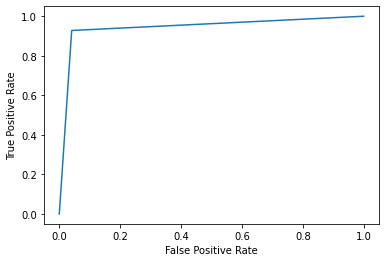

In [ ]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()